In [2]:
import nshutils

nshutils.pretty()

In [6]:
import pickle

with open(
    "/net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/notebooks/problematic_samples.relaxdata.pkl",
    "rb",
) as f:
    data = pickle.load(f)

print(type(data), len(data))

<class 'list'> 75


In [23]:
data[0]["atoms"][0]

{'numbers': array([69, 69, 35, 35, 35, 35, 35, 35, 35, 35]),
 'positions': array([[ 2.8261838 ,  5.42275095,  1.99081469],
        [ 2.21618104,  0.77622139,  0.66514081],
        [ 1.5343082 ,  2.88462496,  2.74978924],
        [ 2.94075704,  5.20146608, -3.40007329],
        [ 3.49222612,  3.3220489 , -0.09689098],
        [-0.74400568,  4.56200933,  5.33113861],
        [ 5.77664232,  1.63403916, -2.69029355],
        [ 0.36834592,  5.3724494 ,  0.19086453],
        [ 2.07852769,  1.01861072,  6.07382965],
        [ 4.66011763,  0.85492861,  2.47658515]]),
 'cell': array([[ 6.34638357,  0.        , -2.88303113],
        [-1.30970216,  6.20977116, -2.88303185],
        [ 0.        ,  0.        ,  8.42662621]]),
 'pbc': array([ True,  True,  True])}

Error: 0.1669 True Formation Energy: -0.3606 Predicted Formation Energy: -0.1937


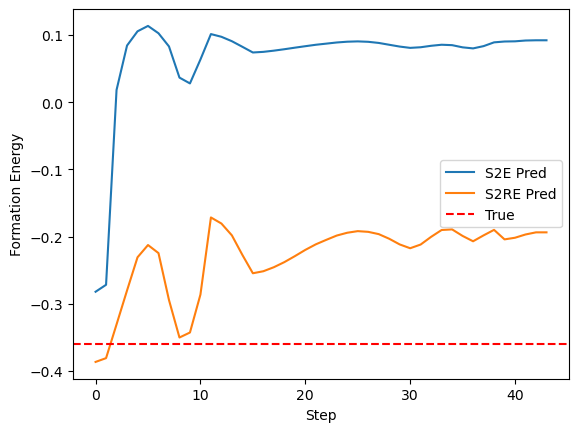

In [21]:
from typing import Any

import ase
import ase.visualize
import matplotlib.pyplot as plt
from IPython.display import display


def plot_energy_vs_steps(sample: dict[str, Any], ax: plt.Axes | None = None):
    e_form_true = sample["true_formation_energy"]

    if ax is None:
        _, ax = plt.subplots()
    ax.plot(sample["s2e_energies"], label="S2E Pred")
    ax.plot(sample["s2re_energies"], label="S2RE Pred")
    ax.axhline(y=e_form_true, color="r", linestyle="--", label="True")

    ax.set_xlabel("Step")
    ax.set_ylabel("Formation Energy")
    ax.legend()

    return ax


def plot_trajectory(sample: dict[str, Any]):
    print(
        f"Error: {sample['error']:0.4f}",
        f"True Formation Energy: {sample['true_formation_energy']:0.4f}",
        f"Predicted Formation Energy: {sample['s2re_energies'][-1]:0.4f}",
    )
    display(ase.visualize.view([ase.Atoms(**d) for d in sample["atoms"]], viewer="ngl"))


def plot_system(sample: dict[str, Any]):
    plot_trajectory(sample)
    plot_energy_vs_steps(sample)
    plt.show()


plot_system(data[6])